In [53]:


import numpy as np
import matplotlib.pyplot as plt
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import quantities as pq
import neo

In [4]:

#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True


In [5]:
#@title Data loading
import numpy as np


fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [80]:
def get_trials_mv_rtl(dat):
    ind=(dat['response'][:]==-1)
    left_act=dat['spks'][:,ind]
    return left_act


def get_trials_mv_ltr(dat):
    ind=(dat['response'][:]==1)
    left_act=dat['spks'][:,ind]
    return left_act
     
def get_trials_nogo(dat):
    ind=(dat['response'][:]==0)
    left_act=dat['spks'][:,ind]
    return left_act   


def get_spike_times(spikes):
    
    spike_times_trials=list()
    for i in range(spikes.shape[1]):
        trial=spikes[:,i]
        #neuron_time=list()
        neurons_in_trial=list()
        for neuron in trial:
            indices=(neuron[:]!=0)
            spike_train_=np.multiply(indices,np.arange(250))
            #spike_train_neuron=np.hstack([[0],spike_train_[indices]])
            spike_train_neuron=spike_train_[indices]
            neurons_in_trial.append(neo.SpikeTrain(spike_train_neuron*pq.ms,t_stop=250.0))

        spike_times_trials.append(neurons_in_trial)
    return spike_times_trials

            
            
            
            
        
        

In [81]:
dat=alldat[0]
spikes=dat['spks']
trials=spikes.shape[1]
spike_trains=get_spike_times(spikes)


In [82]:
from elephant.gpfa import GPFA


# specify fitting parameters
bin_size = 10.0*pq.ms
latent_dimensionality = 2
gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)


In [83]:
gpfa_2dim.fit(spike_trains[:trials])
trajectories = gpfa_2dim.transform(spike_trains[trials//2:])

Initializing parameters using factor analysis...

Fitting GPFA model...


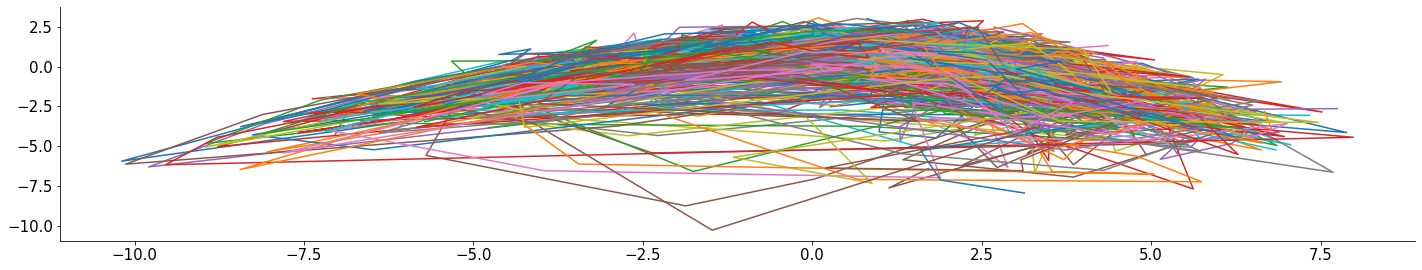

In [84]:
for single_trial_trajectory in trajectories:

    plt.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-')

In [67]:
len(trajectories)

107

In [71]:
print(trajectories.shape,spikes.shape)

(107,) (734, 214, 250)


In [101]:
left_trials=get_trials_mv_rtl(dat)
right_trials=get_trials_mv_ltr(dat)
nogo_trials=get_trials_nogo(dat)

In [102]:
left_spike_times=get_spike_times(left_trials)
right_spike_times=get_spike_times(right_trials)
nogo_spike_times=get_spike_times(nogo_trials)


In [94]:
trajectories_left = gpfa_2dim.transform(left_spike_times)
trajectories_right = gpfa_2dim.transform(right_spike_times)
trajectories_nogo=gpfa_2dim.transform(nogo_spike_times)

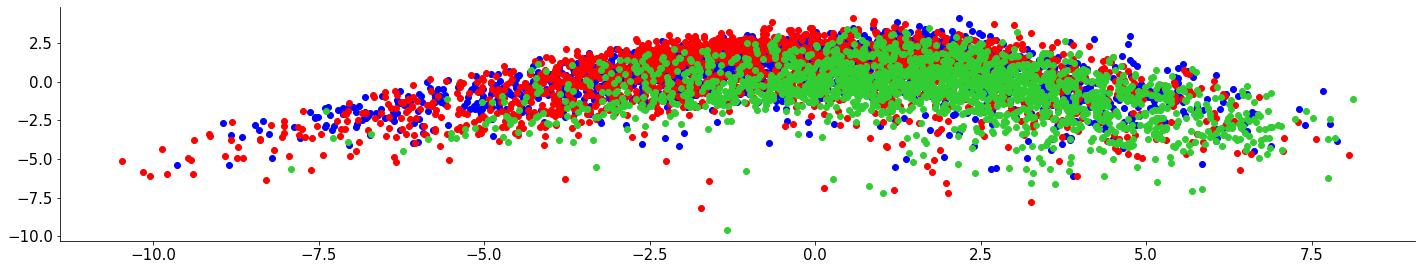

In [106]:
for single_trial_trajectory in trajectories_left:
    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='blue')

   
for single_trial_trajectory in trajectories_right:
    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='red')

for single_trial_trajectory in trajectories_nogo:
    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='limegreen')
    

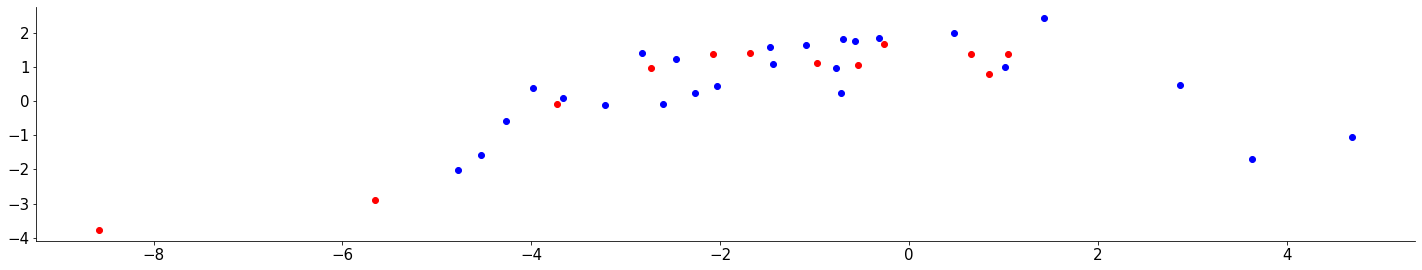

In [99]:
single_trial_trajectory = trajectories_left[0]
plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='blue')

single_trial_trajectory = trajectories_right[0]
plt.scatter(single_trial_trajectory[0,0:12], single_trial_trajectory[1,0:12], c='red')
#print(single_trial_trajectory )

In [104]:
from elephant.gpfa import GPFA


# specify fitting parameters
bin_size = 10.0*pq.ms
latent_dimensionality = 3
gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

gpfa_3dim.fit(spike_trains)

Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(bin_size=array(10.) * ms)

In [105]:
trajectories_left = gpfa_3dim.transform(left_spike_times)
trajectories_right = gpfa_3dim.transform(right_spike_times)
trajectories_nogo=gpfa_3dim.transform(nogo_spike_times)

/tmp/ipykernel_4161/1177805638.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/himanshu/Coding/NMA/steinmetz-analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


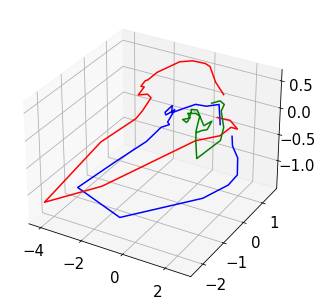

In [132]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)


average_trajectory_left= np.mean(trajectories_left, axis=0)
average_trajectory_right= np.mean(trajectories_right, axis=0)
average_trajectory_nogo= np.mean(trajectories_nogo, axis=0)



ax.plot(average_trajectory_left[0], average_trajectory_left[1],average_trajectory_left[2], c='blue')
ax.plot(average_trajectory_right[0], average_trajectory_right[1],average_trajectory_right[2], c='red')
ax.plot(average_trajectory_nogo[0], average_trajectory_nogo[1],average_trajectory_nogo[2], c='green')
#ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen')
plt.show()

/tmp/ipykernel_4161/1653598041.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


/home/himanshu/Coding/NMA/steinmetz-analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


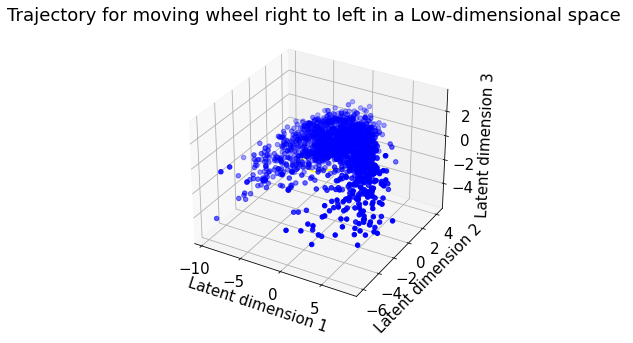

In [129]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory for moving wheel right to left in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_left:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='blue')
ax.plot(average_trajectory_left[0], average_trajectory_left[1],average_trajectory_left[2], c='yellow')

/tmp/ipykernel_4161/3707603366.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


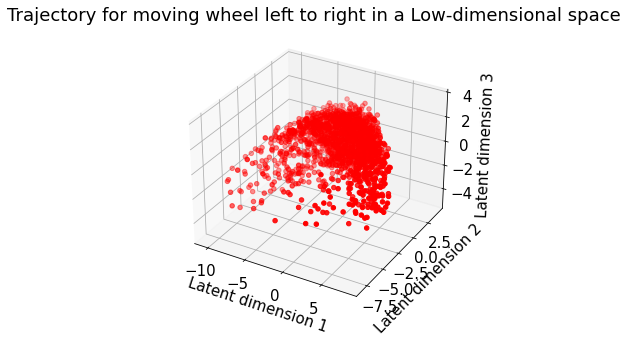

In [122]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_title(f'Trajectory for moving wheel left to right in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_right:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='red')

/tmp/ipykernel_4161/3811045042.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


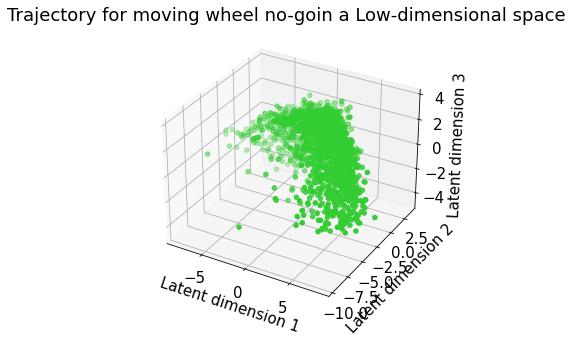

In [123]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_title(f'Trajectory for moving wheel no-goin a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_nogo:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen')

In [120]:
single_trial_trajectory.shape

(3, 25)